In [1]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [4]:
df.drop(['Species'], axis=1, inplace=True)
df = pd.get_dummies(df) 
df

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
# Model Training
train, test = train_test_split(df, test_size=0.3)
x_train = train.drop('Weight', axis=1)
y_train = train['Weight']
x_test = test.drop('Weight', axis=1)
y_test = test['Weight']

In [6]:
%matplotlib inline

# Model Testing
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)

    # Model Fitting
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value for K = ', K, 'is:', error)

RMSE value for K =  1 is: 115.0162017572597
RMSE value for K =  2 is: 111.40382904101637
RMSE value for K =  3 is: 84.21114336396738
RMSE value for K =  4 is: 96.84348640654673
RMSE value for K =  5 is: 101.61202619112889
RMSE value for K =  6 is: 105.5573006800186
RMSE value for K =  7 is: 103.91428311615404
RMSE value for K =  8 is: 118.15535518538452
RMSE value for K =  9 is: 126.14528797376278
RMSE value for K =  10 is: 123.8544541488113
RMSE value for K =  11 is: 123.51823312891605
RMSE value for K =  12 is: 124.754711916042
RMSE value for K =  13 is: 121.76385526284638
RMSE value for K =  14 is: 124.60631320609853
RMSE value for K =  15 is: 124.70961270829066
RMSE value for K =  16 is: 127.00587604375605
RMSE value for K =  17 is: 126.9692797956355
RMSE value for K =  18 is: 128.72539643159462
RMSE value for K =  19 is: 130.3339018050115
RMSE value for K =  20 is: 136.0324323346275


<AxesSubplot:>

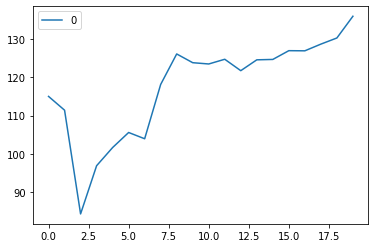

In [7]:
# Plotting RMSE values against value of K
curve = pd.DataFrame(rmse_val)
curve.plot()

In [8]:
# Model Fitting Minimum RMSE
model = neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)
pred = model.predict(x_test)
error = sqrt(mean_squared_error(y_test, pred))
rmse_val.append(error)  # store rmse values
print('RMSE value for K = ', 3, 'is:', error)

RMSE value for K =  3 is: 84.21114336396738


In [9]:
# Prediction Results
test['predicted weights'] = pred
test

,Weight,Length1,Length2,Length3,Height,Width,predicted weights
43,150.0,20.4,22.0,24.7,5.8045,3.7544,141.666667
5,450.0,26.8,29.7,34.7,13.6024,4.9274,460.000000
44,145.0,20.5,22.0,24.3,6.6339,3.5478,136.666667
13,340.0,29.5,32.0,37.3,13.9129,5.0728,566.666667
35,40.0,12.9,14.1,16.2,4.1472,2.2680,30.633333
129,300.0,31.7,34.0,37.8,5.7078,4.1580,266.666667
121,1015.0,37.0,40.0,42.4,12.3808,7.4624,916.666667
117,650.0,36.5,39.0,41.4,11.1366,6.0030,846.666667
153,9.8,11.4,12.0,13.2,2.2044,1.1484,10.700000
51,180.0,23.6,25.2,27.9,7.0866,3.9060,215.666667
